In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg
import sklearn.decomposition
import matplotlib.animation as animation
import openmm.unit as u
import deeptime as dt
import networkx as nx


from cycler import cycler
plt.rcParams['font.size'] = 7
# plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.family'] = 'Ubuntu Sans'
plt.rcParams['mathtext.default'] = 'regular'

plt.rcParams['axes.labelpad'] = 0.1
plt.rcParams['axes.labelsize'] = 7
plt.rcParams['axes.linewidth'] = 0.7
colorList = ['#000000', '#FF0000', '#0000FF', '#FF64FF',
             '#2192E5', '#009900', '#FF8700', '#F2E100', 
             '#FFDE3B', '#5A1AF5']
plt.rcParams['axes.prop_cycle'] = cycler(color=colorList)
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.titlepad'] = 0.1
plt.rcParams['axes.titlesize'] = 7*1.2

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (3.25, 2.5)
plt.rcParams['figure.labelsize'] = 7
plt.rcParams['figure.titlesize'] = 7*1.2

plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.markerscale'] = 1
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.title_fontsize'] = 7*1.2

plt.rcParams['lines.dash_capstyle'] = 'round'
plt.rcParams['lines.dash_joinstyle'] = 'round'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 1

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.transparent'] = True
plt.rcParams['savefig.bbox'] = 'tight'

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['xtick.major.size'] = 3
# plt.rcParams['xtick.major.top'] = True
plt.rcParams['xtick.major.width'] = 0.6
plt.rcParams['xtick.minor.size'] = 1.5
plt.rcParams['xtick.minor.visible'] = True
# plt.rcParams['xtick.minor.top'] = True
plt.rcParams['xtick.minor.width'] = 0.6
plt.rcParams['xtick.top'] = True

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['ytick.major.size'] = 3
# plt.rcParams['ytick.major.right'] = True
plt.rcParams['ytick.major.width'] = 0.6
plt.rcParams['ytick.minor.size'] = 1.5
# plt.rcParams['ytick.minor.right'] = True
plt.rcParams['ytick.minor.width'] = 0.6
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.minor.visible'] = True

In [23]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None,
                                       fontext='ttf')

['/home/ram/miniconda3/envs/deeptime/fonts/SourceCodePro-Bold.ttf',
 '/usr/share/fonts/truetype/ubuntu/UbuntuSansMono[wght].ttf',
 '/home/ram/miniconda3/envs/deeptime/fonts/Ubuntu-LI.ttf',
 '/home/ram/miniconda3/envs/deeptime/fonts/Ubuntu-RI.ttf',
 '/home/ram/miniconda3/envs/deeptime/fonts/Ubuntu-MI.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
 '/home/ram/miniconda3/envs/deeptime/fonts/Ubuntu-R.ttf',
 '/home/ram/miniconda3/envs/deeptime/fonts/SourceCodePro-Black.ttf',
 '/home/ram/miniconda3/envs/deeptime/fonts/SourceCodePro-BoldIt.ttf',
 '/usr/share/fonts/truetype/ubuntu/UbuntuMono[wght].ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-BoldOblique.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-L.ttf',
 '/home/ram/miniconda3/envs/deeptime/fonts/Ubuntu-B.ttf',
 '/home/ram/miniconda3/envs/deeptime/fonts/SourceCodePro-ExtraLight.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf',
 '/usr/share/fonts/truetype/ubunt

In [38]:
# import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths='/mnt/c/Windows/Fonts/',
                                       fontext='ttf')

['/mnt/c/Windows/Fonts/seguibl.ttf',
 '/mnt/c/Windows/Fonts/msyh.ttc',
 '/mnt/c/Windows/Fonts/verdana.ttf',
 '/mnt/c/Windows/Fonts/YuGothR.ttc',
 '/mnt/c/Windows/Fonts/corbeli.ttf',
 '/mnt/c/Windows/Fonts/segoepr.ttf',
 '/mnt/c/Windows/Fonts/calibri.ttf',
 '/mnt/c/Windows/Fonts/gadugi.ttf',
 '/mnt/c/Windows/Fonts/Candarali.ttf',
 '/mnt/c/Windows/Fonts/holomdl2.ttf',
 '/mnt/c/Windows/Fonts/Candarab.ttf',
 '/mnt/c/Windows/Fonts/mvboli.ttf',
 '/mnt/c/Windows/Fonts/msyhl.ttc',
 '/mnt/c/Windows/Fonts/corbelb.ttf',
 '/mnt/c/Windows/Fonts/seguihis.ttf',
 '/mnt/c/Windows/Fonts/calibril.ttf',
 '/mnt/c/Windows/Fonts/cambriab.ttf',
 '/mnt/c/Windows/Fonts/framdit.ttf',
 '/mnt/c/Windows/Fonts/taileb.ttf',
 '/mnt/c/Windows/Fonts/courbi.ttf',
 '/mnt/c/Windows/Fonts/ntailu.ttf',
 '/mnt/c/Windows/Fonts/Candara.ttf',
 '/mnt/c/Windows/Fonts/framd.ttf',
 '/mnt/c/Windows/Fonts/malgun.ttf',
 '/mnt/c/Windows/Fonts/constan.ttf',
 '/mnt/c/Windows/Fonts/Inkfree.ttf',
 '/mnt/c/Windows/Fonts/msjh.ttc',
 '/mnt/c/W

In [41]:
fp = matplotlib.font_manager.FontProperties(fname=r"/mnt/c/Windows/Fonts/calibri.ttf")
print(fp.get_name())

Calibri


In [56]:
matplotlib.font_manager.get_font_names()

['DejaVu Serif Display',
 'STIXSizeThreeSym',
 'Ubuntu Condensed',
 'cmss10',
 'cmr10',
 'STIXNonUnicode',
 'cmex10',
 'Ubuntu Sans',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'Ubuntu Mono',
 'STIXSizeFourSym',
 'Source Code Pro',
 'Ubuntu Sans Mono',
 'STIXSizeFiveSym',
 'cmsy10',
 'STIXGeneral',
 'DejaVu Sans',
 'Inconsolata',
 'cmb10',
 'Ubuntu',
 'DejaVu Sans Display',
 'STIXSizeTwoSym',
 'cmtt10',
 'cmmi10',
 'DejaVu Serif']

In [62]:
matplotlib.font_manager._rebuild()

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

# Utils

In [2]:
def SVD(rateMatrix):
    """ Utility function for SVD of Q matrix
        returns the Eigenvalues and Eigenvectors of the Rate Matrix Q
    """
    # it is transpose because the function returns 
    # the right eigenvec's but we want left eigenvectors
    eig_val, eig_vec = np.linalg.eig(rateMatrix.T)
    return (eig_val, eig_vec)

def Prob_t(uniqueStates, val, vec, time):
    """ returns the time evolution of the probabilites
        Note that this can be used for simulating the time evolution of the probabilities and
        as the starting point for the construction of a Transition Matrix at the
        desired lagtime
    """
    # this works because of how numpy casts when performing the operation
    D = np.eye(uniqueStates) * np.exp(val * time)
    return np.linalg.inv(vec.T) @ D @ vec.T

def MSMtraj(steps, transitionMatrix):
    """ returns the MSM and a discrete time discrete state 
        trajectory from the Transition Matrix
        at the spicified lagtime of shape (steps,)
    """
    MSM_true = dt.markov.msm.MarkovStateModel(transitionMatrix)
    traj_discretized = MSM_true.simulate(steps)
    return (MSM_true, traj_discretized)

In [3]:
def isallowedTransition(i, j):
    """
    Function for determining if i -> j transition is allowed.
    """
    debug = 0
    result = False
    diff = j - i
    numConductions = np.abs(diff.sum())
    condForward = diff == 1
    condBackward = diff == -1
    if numConductions == 0 and condForward.sum() == 1 and condBackward.sum() == 1:
        delta = np.where(condForward)[0] - np.where(condBackward)[0]
        if debug:
            print(i, j, condForward, condBackward, numForward, numBackward, delta)
        if delta == 1:
            numConductions, result = 1, True
        elif delta == -1:
            numConductions, result = -1, True
    elif numConductions == 1 and diff[0] == 1 and condBackward.sum() == 0:
        result = True
    elif numConductions == 1 and diff[-1] == -1 and condForward.sum() == 0:
        result = True
    return (numConductions, result)

In [4]:
def isConduction(i, j):
    """
    Function for determining if i -> j transition leads to conduction or
    is internal transition.
    """
    # diff = j - i
    # numConductions = np.abs(diff.sum())
    numi = i.sum()
    numj = j.sum()
    diff = numj - numi
    result = False
    # if diff > 0:
    #     # recuited particles
        
    # if numConductions == 1:
    #     result = True
    if numi != numj:
        # no new ions
        result = True
    return (diff, result)

In [5]:
# old
def isallowedTransitionOld(i, j):
    """
    Function for determining if i -> j transition is allowed.
    """
    debug = 0
    diff = j - i
    numConductions = np.abs(diff.sum())
    condForward = diff == 1
    condBackward = diff == -1
    numForward = np.sum(condForward)
    numBackward = np.sum(condBackward)
    if numForward == 1 and numBackward == 1:
        delta = np.abs(np.where(condForward)[0] - np.where(condBackward)[0])[0]
        if debug:
            print(i, j, condForward, condBackward, numForward, numBackward, delta)
        if delta == 1:
            return 1
    elif numForward == 1 and numBackward == 0 and diff[0] == 1: #or diff[-1] == 1): # not consider because assymmetric
        return 1
    elif numBackward == 1 and diff[-1] == -1 and numForward == 0:
        return 1
    return 0

# ASEP Model

Parameter definitions \
$\alpha =$ first site entrance rate \
$p = $ forward rate \
$q = $ backward rate \
$\beta = $ last site exit rate

We use 8 sites, $\alpha=\beta=p=1$, and $q=\frac{1}{3}$

In [6]:
alpha, beta, p = [1]*3
q = 1/3

In [7]:
from itertools import combinations, permutations, combinations_with_replacement, product

In [8]:
microstates = np.array(list(product([0,1], repeat=8)))

In [9]:
microstates

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]], shape=(256, 8))

In [8]:
# old
i = 0
for j in range(microstates.shape[0]):
    if isallowedTransition(microstates[i], microstates[j]):
        diff = microstates[j] - microstates[i]
        if diff.sum() == 1:
            conduction = "+1"
        elif diff.sum() == 0:
            if np.where(diff == 1)[0] > np.where(diff == -1)[0]:
                conduction = "+1"
            else:
                conduction = "-1"
        elif diff.sum() == -1 and diff[-1] == -1:
            conduction = "+1"
        else:
            conduction = "-1"
        print("{:<10}\t{:8}\n{} -> {} {}".format(i,j, microstates[i], 
                                                 microstates[j], conduction), 
              '\n',
              "diff: ", diff, "locs: ", np.where((diff == 1) + (diff == -1)))

0         	     128
[0 0 0 0 0 0 0 0] -> [1 0 0 0 0 0 0 0] +1 
 diff:  [1 0 0 0 0 0 0 0] locs:  (array([0]),)


In [9]:
# old and new implementations agree
for i in range(microstates.shape[0]):
    for j in range(microstates.shape[1]):
        conds, a = isallowedTransition(microstates[i], microstates[j])
        b = isallowedTransitionOld(microstates[i], microstates[j])
        if a != b:
            print(i, j, microstates[i], microstates[j])

In [10]:
i = 250
for j in range(microstates.shape[0]):
    conds, _ = isallowedTransition(microstates[i], microstates[j])
    if _:
        diff = microstates[j] - microstates[i]
        print("{:<10}\t{:8}\n{} -> {} {:+}".format(i,j, microstates[i], 
                                                   microstates[j], conds), 
              '\n',
              "diff: ", diff, "locs: ", np.where((diff == 1) + (diff == -1)))

250       	     246
[1 1 1 1 1 0 1 0] -> [1 1 1 1 0 1 1 0] +1 
 diff:  [ 0  0  0  0 -1  1  0  0] locs:  (array([4, 5]),)
250       	     249
[1 1 1 1 1 0 1 0] -> [1 1 1 1 1 0 0 1] +1 
 diff:  [ 0  0  0  0  0  0 -1  1] locs:  (array([6, 7]),)
250       	     252
[1 1 1 1 1 0 1 0] -> [1 1 1 1 1 1 0 0] -1 
 diff:  [ 0  0  0  0  0  1 -1  0] locs:  (array([5, 6]),)


In [11]:
Q = np.zeros((2**8, 2**8))
for i in range(Q.shape[0]):
    for j in range(Q.shape[1]):
        conds, _ = isallowedTransition(microstates[i], microstates[j])
        if _:
            if microstates[i][0] == 0 and microstates[j][0] == 1 and conds == 1:
                # entrance rate
                Q[i][j] = alpha
            elif microstates[i][-1] == 1 and microstates[j][-1] == 0 and conds == 1:
                # exit rate
                Q[i][j] = beta
            elif conds == 1:
                # forward rate
                Q[i][j] = p
            elif conds == -1:
                Q[i][j] = q

In [12]:
i = 0
for j in range(microstates.shape[0]):
    conds, _ = isallowedTransition(microstates[i], microstates[j])
    if _:
        diff = microstates[j] - microstates[i]
        print("{:<10}\t{:8}\n{} -> {} {:+}".format(i,j, microstates[i], 
                                                   microstates[j], conds), 
              '\n',
              "diff: ", diff, "locs: ", np.where((diff == 1) + (diff == -1)))
        print("Rate: ", Q[i][j])

0         	     128
[0 0 0 0 0 0 0 0] -> [1 0 0 0 0 0 0 0] +1 
 diff:  [1 0 0 0 0 0 0 0] locs:  (array([0]),)
Rate:  1.0


In [48]:
for i in range(240, microstates.shape[0]):
    for j in range(microstates.shape[0]):
        conds, _ = isallowedTransition(microstates[i], microstates[j])
        if _:
            diff = microstates[j] - microstates[i]
            print("{:<10}\t{:8}\n{} -> {} {:+}".format(i,j, microstates[i], 
                                                       microstates[j], conds), 
                  '\n',
                  "diff: ", diff, "locs: ", np.where((diff == 1) + (diff == -1)))
            print("Rate: ", Q[i][j])

240       	     232
[1 1 1 1 0 0 0 0] -> [1 1 1 0 1 0 0 0] +1 
 diff:  [ 0  0  0 -1  1  0  0  0] locs:  (array([3, 4]),)
Rate:  1.0
241       	     233
[1 1 1 1 0 0 0 1] -> [1 1 1 0 1 0 0 1] +1 
 diff:  [ 0  0  0 -1  1  0  0  0] locs:  (array([3, 4]),)
Rate:  1.0
241       	     240
[1 1 1 1 0 0 0 1] -> [1 1 1 1 0 0 0 0] +1 
 diff:  [ 0  0  0  0  0  0  0 -1] locs:  (array([7]),)
Rate:  1.0
241       	     242
[1 1 1 1 0 0 0 1] -> [1 1 1 1 0 0 1 0] -1 
 diff:  [ 0  0  0  0  0  0  1 -1] locs:  (array([6, 7]),)
Rate:  0.3333333333333333
242       	     234
[1 1 1 1 0 0 1 0] -> [1 1 1 0 1 0 1 0] +1 
 diff:  [ 0  0  0 -1  1  0  0  0] locs:  (array([3, 4]),)
Rate:  1.0
242       	     241
[1 1 1 1 0 0 1 0] -> [1 1 1 1 0 0 0 1] +1 
 diff:  [ 0  0  0  0  0  0 -1  1] locs:  (array([6, 7]),)
Rate:  1.0
242       	     244
[1 1 1 1 0 0 1 0] -> [1 1 1 1 0 1 0 0] -1 
 diff:  [ 0  0  0  0  0  1 -1  0] locs:  (array([5, 6]),)
Rate:  0.3333333333333333
243       	     235
[1 1 1 1 0 0 1 1] -> [1 1 1 0

In [12]:
np.sum(Q, axis=1)[21:]

array([5.        , 3.66666667, 3.66666667, 2.33333333, 3.66666667,
       3.66666667, 3.66666667, 2.33333333, 3.66666667, 2.33333333,
       2.33333333, 2.33333333, 3.66666667, 3.66666667, 3.66666667,
       3.66666667, 5.        , 3.66666667, 3.66666667, 3.66666667,
       5.        , 5.        , 5.        , 3.66666667, 5.        ,
       3.66666667, 3.66666667, 2.33333333, 3.66666667, 3.66666667,
       3.66666667, 3.66666667, 5.        , 3.66666667, 3.66666667,
       2.33333333, 3.66666667, 3.66666667, 3.66666667, 2.33333333,
       3.66666667, 2.33333333, 2.33333333, 2.33333333, 3.66666667,
       3.66666667, 3.66666667, 3.66666667, 5.        , 3.66666667,
       3.66666667, 3.66666667, 5.        , 5.        , 5.        ,
       3.66666667, 5.        , 3.66666667, 3.66666667, 3.66666667,
       5.        , 5.        , 5.        , 5.        , 6.33333333,
       5.        , 5.        , 3.66666667, 5.        , 5.        ,
       5.        , 3.66666667, 5.        , 3.66666667, 3.66666

In [13]:
Q += -1 * np.eye(2**8) * np.sum(Q, axis=1)

In [14]:
Q[21]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        1.        , -5.        ,  0.33333333,  0.        ,  0.        ,
        0.33333333,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.33333333,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [14]:
tau = 10
transMat = scipy.linalg.expm(Q * tau)

In [16]:
transMat[0]

array([4.41503767e-04, 2.95430735e-04, 6.18760759e-04, 1.48099720e-04,
       1.05859558e-03, 3.35044903e-04, 5.39115335e-04, 5.68729903e-05,
       1.68955674e-03, 6.12235198e-04, 1.05023106e-03, 1.41790234e-04,
       1.41424036e-03, 2.41881655e-04, 3.54597889e-04, 1.77413924e-05,
       2.58312318e-03, 1.02070962e-03, 1.81532874e-03, 2.76318021e-04,
       2.57554968e-03, 5.11772608e-04, 7.70135502e-04, 4.88517141e-05,
       3.29468625e-03, 7.27750641e-04, 1.13449196e-03, 9.01124543e-05,
       1.39986432e-03, 1.38386081e-04, 1.94688294e-04, 4.94279246e-06,
       3.82061768e-03, 1.60187155e-03, 2.91609540e-03, 4.78551792e-04,
       4.26822105e-03, 9.25510376e-04, 1.41249779e-03, 1.00862887e-04,
       5.70338115e-03, 1.40410120e-03, 2.24132352e-03, 2.05708500e-04,
       2.83249977e-03, 3.27229488e-04, 4.66263500e-04, 1.48919029e-05,
       7.08931930e-03, 1.86788926e-03, 3.04520479e-03, 3.09510468e-04,
       3.95862234e-03, 5.18290923e-04, 7.50937639e-04, 2.98705362e-05,
      

In [15]:
MSM = dt.markov.msm.MarkovStateModel(transMat)

In [22]:
np.all(MSM.transition_matrix == transMat)

np.True_

In [35]:
MSM.eigenvalues()

array([ 1.00000000e+00+0.00000000e+00j,  2.10379104e-01+0.00000000e+00j,
        1.77055434e-02+1.38783257e-02j,  1.77055434e-02-1.38783257e-02j,
       -6.56334785e-04+2.10722797e-03j, -6.56334785e-04-2.10722797e-03j,
        1.30536433e-03+0.00000000e+00j, -2.51226991e-04-1.47108540e-04j,
       -2.51226991e-04+1.47108540e-04j,  6.37457352e-05-5.73362772e-05j,
        6.37457352e-05+5.73362772e-05j,  5.80860189e-05-2.32902282e-05j,
        5.80860189e-05+2.32902282e-05j,  5.81047694e-05+0.00000000e+00j,
        4.96903943e-05+1.74249930e-05j,  4.96903943e-05-1.74249930e-05j,
       -1.22850466e-05+2.43061395e-05j, -1.22850466e-05-2.43061395e-05j,
       -6.87709612e-06+2.56683092e-05j, -6.87709612e-06-2.56683092e-05j,
       -1.28739053e-05+1.13737873e-05j, -1.28739053e-05-1.13737873e-05j,
        1.24668702e-07+4.68718519e-06j,  1.24668702e-07-4.68718519e-06j,
       -3.59702910e-06+4.83353881e-07j, -3.59702910e-06-4.83353881e-07j,
        1.24352254e-06+2.49605855e-06j,  1.24352254

In [16]:
koopmanMat = MSM.to_koopman_model(empirical=False)

In [17]:
koopmanMat.koopman_matrix[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
np.all(MSM.koopman_model.koopman_matrix == koopmanMat.koopman_matrix)

np.True_

In [18]:
start = np.random.randint(0, 2**8)
start

129

In [19]:
traj = MSM.simulate(10**6, start=start)

In [20]:
traj = MSM.simulate(200, start=start)

In [21]:
traj

array([129, 212, 154, 200,  66, 140,  38, 225, 194, 176, 138, 216, 217,
       216,  98, 213, 140, 140, 214, 244, 248, 200, 188, 185, 196, 219,
        76, 154, 210, 212,  56, 242, 194, 120, 220, 150, 221, 106, 196,
        84, 177, 110, 124, 205, 131,  88, 226, 176,  89,  88, 224, 100,
       232, 184, 230, 178, 232,  61, 177, 228,  65, 201, 252, 176, 168,
       248, 236,  56, 172, 118,  40, 212, 242, 156,  41, 221, 190, 232,
       121,  90, 212, 164, 165, 224, 198, 228, 198, 236, 208, 152,  26,
       228, 168, 176, 184, 210, 243, 204, 148, 160, 226, 244, 216, 114,
       214, 154, 170, 240, 148, 240, 214, 138, 202, 161, 245, 248, 210,
       178,  73,  59, 228, 236, 200,  81, 120, 212, 150, 162, 202, 180,
       152, 155, 216, 224, 198, 106, 115, 186, 212, 246, 156,  52, 186,
       178, 188, 115, 106, 136, 146, 228,  98,  90,  83,  96,  80, 113,
       252, 212, 196, 196, 120, 110, 216, 192, 240,  50, 154, 172, 153,
        88,  99, 232, 152, 252, 248, 200, 226, 244, 201, 108, 20

In [22]:
for i, j in zip(traj[:-1], traj[1:]):
    K, _ = isConduction(microstates[i], microstates[j]) 
    print(i, microstates[i], microstates[i].sum(), 
          j, microstates[j], microstates[j].sum(),
          K, _)

129 [1 0 0 0 0 0 0 1] 2 212 [1 1 0 1 0 1 0 0] 4 2 True
212 [1 1 0 1 0 1 0 0] 4 154 [1 0 0 1 1 0 1 0] 4 0 False
154 [1 0 0 1 1 0 1 0] 4 200 [1 1 0 0 1 0 0 0] 3 -1 True
200 [1 1 0 0 1 0 0 0] 3 66 [0 1 0 0 0 0 1 0] 2 -1 True
66 [0 1 0 0 0 0 1 0] 2 140 [1 0 0 0 1 1 0 0] 3 1 True
140 [1 0 0 0 1 1 0 0] 3 38 [0 0 1 0 0 1 1 0] 3 0 False
38 [0 0 1 0 0 1 1 0] 3 225 [1 1 1 0 0 0 0 1] 4 1 True
225 [1 1 1 0 0 0 0 1] 4 194 [1 1 0 0 0 0 1 0] 3 -1 True
194 [1 1 0 0 0 0 1 0] 3 176 [1 0 1 1 0 0 0 0] 3 0 False
176 [1 0 1 1 0 0 0 0] 3 138 [1 0 0 0 1 0 1 0] 3 0 False
138 [1 0 0 0 1 0 1 0] 3 216 [1 1 0 1 1 0 0 0] 4 1 True
216 [1 1 0 1 1 0 0 0] 4 217 [1 1 0 1 1 0 0 1] 5 1 True
217 [1 1 0 1 1 0 0 1] 5 216 [1 1 0 1 1 0 0 0] 4 -1 True
216 [1 1 0 1 1 0 0 0] 4 98 [0 1 1 0 0 0 1 0] 3 -1 True
98 [0 1 1 0 0 0 1 0] 3 213 [1 1 0 1 0 1 0 1] 5 2 True
213 [1 1 0 1 0 1 0 1] 5 140 [1 0 0 0 1 1 0 0] 3 -2 True
140 [1 0 0 0 1 1 0 0] 3 140 [1 0 0 0 1 1 0 0] 3 0 False
140 [1 0 0 0 1 1 0 0] 3 214 [1 1 0 1 0 1 1 0] 5 2 True
214 [

In [27]:
microstates[9]

array([0, 0, 0, 0, 1, 0, 0, 1])

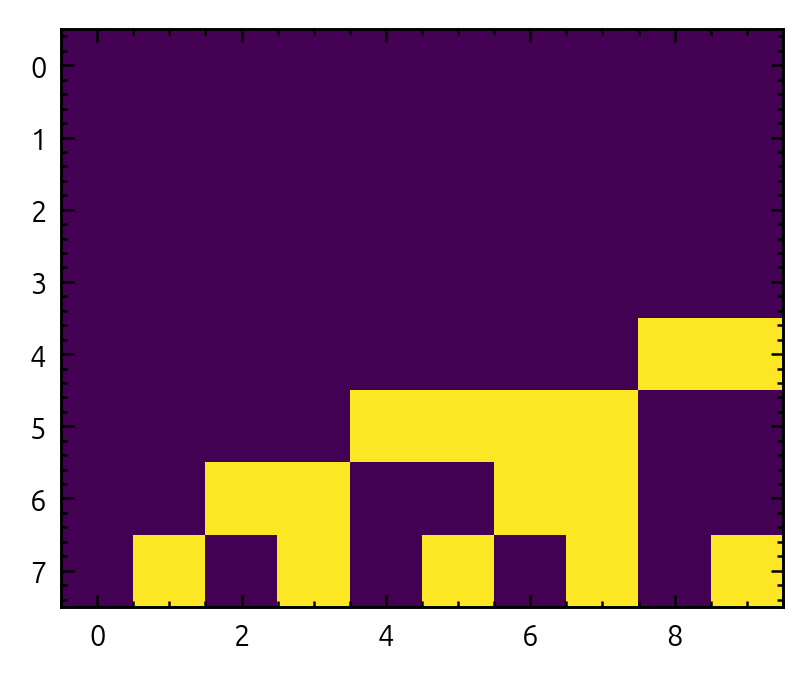

In [31]:
# plt.imshow(microstates[12].reshape((8,1)))
plt.imshow(microstates[0:10].T)
# plt.ylim([0,7])
plt.show()